# Data Integration (in Data Science)
### Definition

Data integration is the process of combining data from multiple sources into a single, consistent, and usable dataset for analysis, reporting, or modeling.

### Why Data Integration Matters

In real-world data science, data rarely lives in one place. Integration enables you to:

Build a complete view of a problem

Improve data quality and consistency

Enable accurate analysis and decision-making

Support dashboards, ML models, and reporting

## Common Data Sources

Databases (SQL, NoSQL)

CSV / Excel files

APIs (e.g., survey tools, web services)

Logs and system exports

Third-party datasets

## Types of Data Integration
### 1. Manual Integration

Copy/paste or basic merging

Small-scale, error-prone

Used for quick analysis

### 2. ETL (Extract, Transform, Load)

Extract data from sources

Transform (clean, standardize, enrich)

Load into a warehouse or analytics system

Most common in enterprise and development programs.

### 3. ELT

Extract → Load → Transform

Used when storage is cheap and transformations are heavy (cloud systems)

### 4. Data Federation (Virtual Integration)

Data stays in original systems

Queried in real time

Slower but avoids duplication

In [1]:
import pandas as pd

In [14]:
df1 = pd.DataFrame(
    {"acc": [1,2,3], "name": [0,9,8], "age": [2,4,6]}
)

df2 = pd.DataFrame(
    {"principle": [2,3,55], "interest": [4.5,7.8,9.8]}
)

In [15]:
pd.concat([df1, df2], axis = 1)

,acc,name,age,principle,interest
0,1,0,2,2,4.5
1,2,9,4,3,7.8
2,3,8,6,55,9.8


In [16]:
pd.concat([df1, df2], axis = 0)

,acc,name,age,principle,interest
0,1.0,0.0,2.0,NaN,NaN
1,2.0,9.0,4.0,NaN,NaN
2,3.0,8.0,6.0,NaN,NaN
0,NaN,NaN,NaN,2.0,4.5
1,NaN,NaN,NaN,3.0,7.8
2,NaN,NaN,NaN,55.0,9.8


In [19]:
pd.concat([df1, df2], axis = 0, ignore_index=True)

,acc,name,age,principle,interest
0,1.0,0.0,2.0,NaN,NaN
1,2.0,9.0,4.0,NaN,NaN
2,3.0,8.0,6.0,NaN,NaN
3,NaN,NaN,NaN,2.0,4.5
4,NaN,NaN,NaN,3.0,7.8
5,NaN,NaN,NaN,55.0,9.8


# Merging  or Join

| concat             | merge           |
| ------------------ | --------------- |
| Stacks data        | Matches on keys |
| No key required    | Key required    |
| Simple combination | Relational join |
| Fast               | More complex    |


In [43]:
df3 = pd.DataFrame(
    {"key": ["A", "B", "C", "D"], "inv_val": [99, 55, 33, 22], "acc": [1, 3, 5, 7]}
)

df4 = pd.DataFrame(
    {"key": ["E", "B", "C", "Z"], "hel_ratio": [99, 45, 33, 22], "acc": [11, 32, 53, 74]}
)

In [44]:
df3

,key,inv_val,acc
0,A,99,1
1,B,55,3
2,C,33,5
3,D,22,7


In [45]:
df4

,key,hel_ratio,acc
0,E,99,11
1,B,45,32
2,C,33,53
3,Z,22,74


In [40]:
df3,  df4

(  key  hel_ratio  acc
 0   E         99   11
 1   B         45   32
 2   C         33   53
 3   Z         22   74,
   key  hel_ratio  acc
 0   E         99   11
 1   B         45   32
 2   C         33   53
 3   Z         22   74)

In [35]:
pd.merge(df3, df4, how = "inner", on = "key")


,key,inv_val,acc_x,hel_ratio,acc_y
0,B,55,3,45,32
1,C,33,5,33,53


In [36]:
pd.merge(df3, df4, how = "inner", on = "key", suffixes = ("_df3", "_df4"))

,key,inv_val,acc_df3,hel_ratio,acc_df4
0,B,55,3,45,32
1,C,33,5,33,53


In [46]:
pd.merge(df3, df4, how = "outer", on = "key", suffixes = ("_df3", "_df4"))

,key,inv_val,acc_df3,hel_ratio,acc_df4
0,A,99.0,1.0,NaN,NaN
1,B,55.0,3.0,45.0,32.0
2,C,33.0,5.0,33.0,53.0
3,D,22.0,7.0,NaN,NaN
4,E,NaN,NaN,99.0,11.0
5,Z,NaN,NaN,22.0,74.0


In [49]:
pd.merge(df4, df3, how = "right", on = "key", suffixes = ("_df4", "_df3"))

,key,hel_ratio,acc_df4,inv_val,acc_df3
0,A,NaN,NaN,99,1
1,B,45.0,32.0,55,3
2,C,33.0,53.0,33,5
3,D,NaN,NaN,22,7


In [50]:
df3.merge(df4, on = "key", how = "inner")

,key,inv_val,acc_x,hel_ratio,acc_y
0,B,55,3,45,32
1,C,33,5,33,53


In [51]:
df4.merge(df3, on = "key", how = "inner")

,key,hel_ratio,acc_x,inv_val,acc_y
0,B,45,32,55,3
1,C,33,53,33,5


# Joining

What join means (plain English)

join is used to combine two DataFrames using their index by default, or a key column from the right DataFrame.
Think of it as a convenience wrapper around merge, optimized for index-based joins.
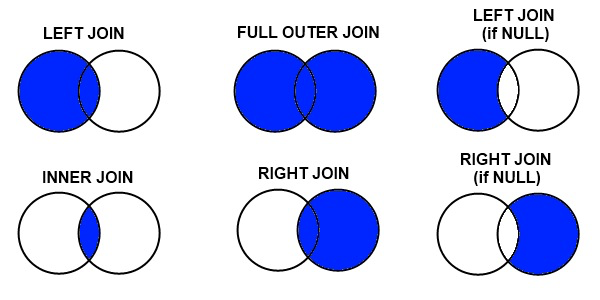
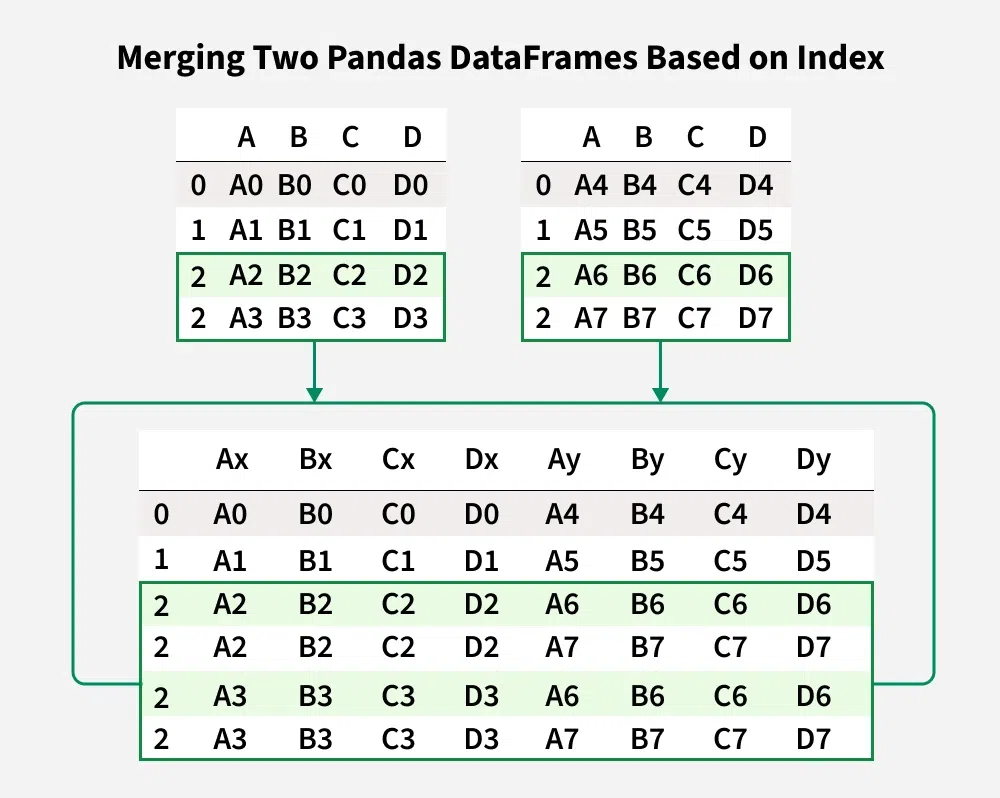
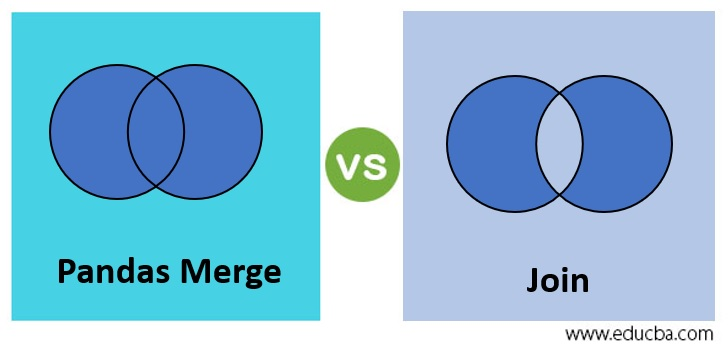

In [52]:
df3, df4

(  key  inv_val  acc
 0   A       99    1
 1   B       55    3
 2   C       33    5
 3   D       22    7,
   key  hel_ratio  acc
 0   E         99   11
 1   B         45   32
 2   C         33   53
 3   Z         22   74)

In [61]:
df4.join(df3, how = "right", lsuffix= "_left", rsuffix= "_right")

,key_left,hel_ratio,acc_left,key_right,inv_val,acc_right
0,E,99,11,A,99,1
1,B,45,32,B,55,3
2,C,33,53,C,33,5
3,Z,22,74,D,22,7


In [58]:
df3.join(df4, how = "right", lsuffix= "_left", rsuffix= "_right")

,key_left,inv_val,acc_left,key-right,hel_ratio,acc-right
0,A,99,1,E,99,11
1,B,55,3,B,45,32
2,C,33,5,C,33,53
3,D,22,7,Z,22,74


In [60]:
df3.join(df4, how = "left", lsuffix= "_left", rsuffix= "_right")

,key_left,inv_val,acc_left,key_right,hel_ratio,acc_right
0,A,99,1,E,99,11
1,B,55,3,B,45,32
2,C,33,5,C,33,53
3,D,22,7,Z,22,74


In [63]:
stacked = df3.stack()
stacked

0  key         A
   inv_val    99
   acc         1
1  key         B
   inv_val    55
   acc         3
2  key         C
   inv_val    33
   acc         5
3  key         D
   inv_val    22
   acc         7
dtype: object

In [64]:
stacked.unstack()

,key,inv_val,acc
0,A,99,1
1,B,55,3
2,C,33,5
3,D,22,7


SAve Data to CSV


In [1]:
Titanic_data.csv

NameError: name 'Titanic_data' is not defined